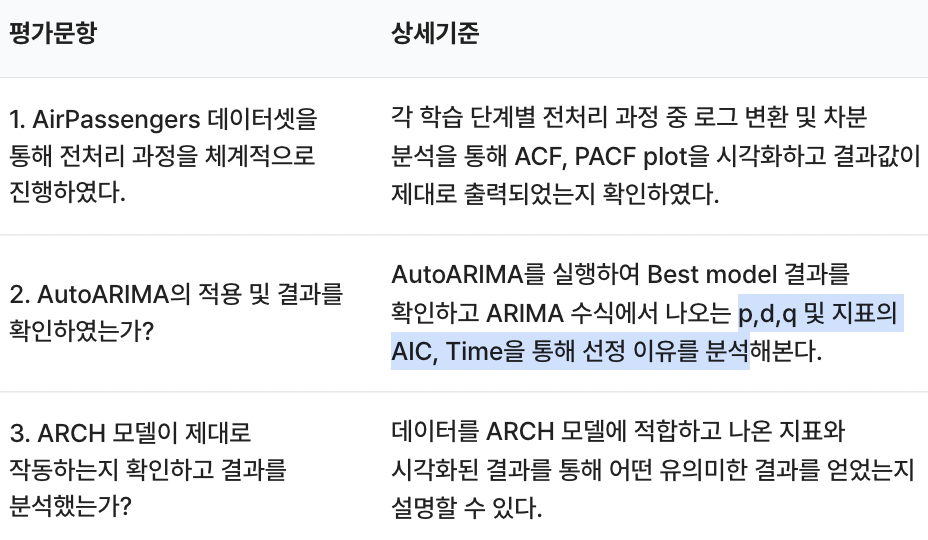

평가문항의 3번 -> 상세기준 -> 설명할 수 있다. -> 아니 나는 설명할 수 없다.

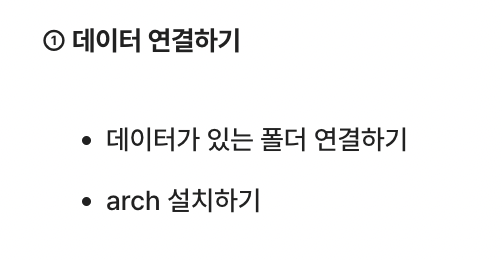

In [175]:
pwd

'/aiffel'

In [176]:
cd ~

/aiffel


In [177]:
# 먼저 데이터가 저장된 폴더를 연결합시다.
!mkdir -p aiffel/time_series_basic
#!ln -s data/* aiffel/time_series_basic
!cp data/AirPassengers.csv aiffel/time_series_basic/

In [178]:
!pip install arch

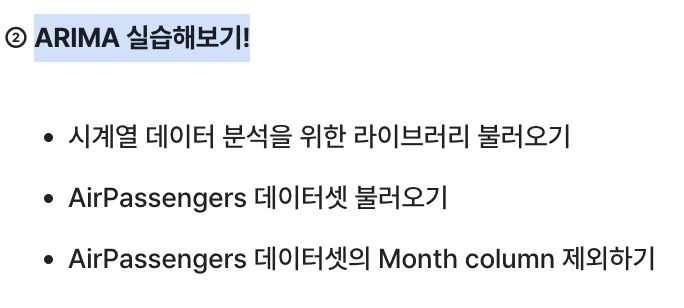

statsmodels.graphics.tsaplots.plot_pacf  
(x, ax=None, lags=None, alpha=0.05, method='ywm', use_vlines=True, title='Partial Autocorrelation', zero=True, vlines_kwargs=None, **kwargs)

https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html

statsmodels.graphics.tsaplots.plot_acf  
(x, ax=None, lags=None, *, alpha=0.05, use_vlines=True, adjusted=False, fft=False, missing='none', title='Autocorrelation', zero=True, auto_ylims=False, bartlett_confint=True, vlines_kwargs=None, **kwargs)
https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html#statsmodels.graphics.tsaplots.plot_acf

statsmodels.tsa.arima.model.ARIMA  
(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True)  
https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html#statsmodels.tsa.arima.model.ARIMA

https://alkaline-ml.com/pmdarima/refreshing.html#

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA 
import pmdarima as pm #auto ARIMA

In [180]:
import seaborn as sns
sns.set(style= "whitegrid")

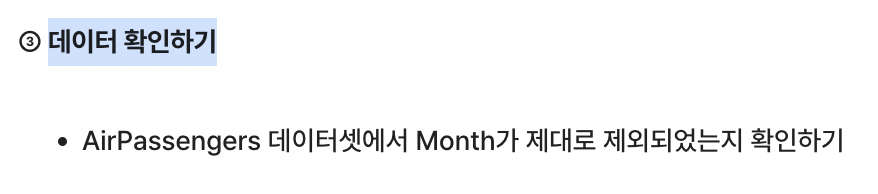

os.getenv(key, default=None)

In [181]:
import os
path = os.getenv("HOME")
airp = pd.read_csv(path + "/aiffel/time_series_basic/AirPassengers.csv")
airp.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


airp.drop(
    labels=None,
    axis: 'Axis' = 0,
    index=None,
    columns=None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'str' = 'raise',
)

In [182]:
airp.drop(columns= "Month", inplace= True)

In [183]:
airp

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [184]:
airp.info()
#144 int64 1 columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 1.2 KB


Text(44.66061388888889, 0.5, 'Passengers')

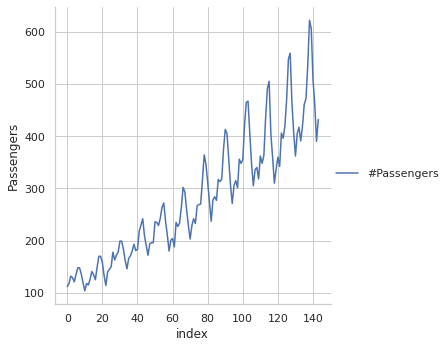

In [185]:
sns.relplot(data= airp, kind= "line");
plt.xlabel("index")
plt.ylabel("Passengers")

In [186]:
airp.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [187]:
airp.value_counts()

#Passengers
229            3
237            2
242            2
196            2
355            2
              ..
203            1
201            1
194            1
193            1
622            1
Length: 118, dtype: int64

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)

[]

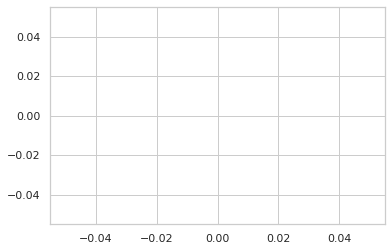

In [188]:
plt.plot(data= airp)

오.. data= 하면 안나오는 군..

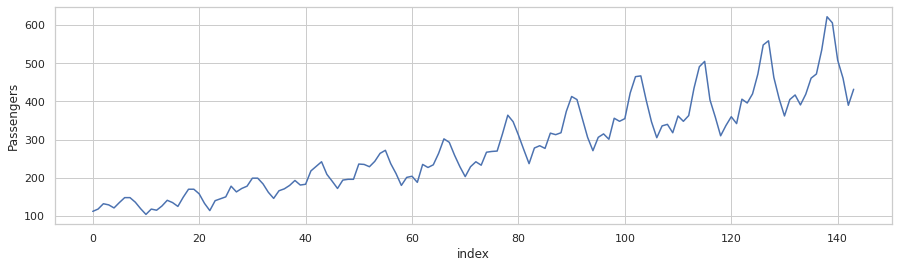

In [189]:
plt.figure(figsize= (15, 4))
plt.xlabel("index")
plt.ylabel("Passengers")
plt.plot(airp);

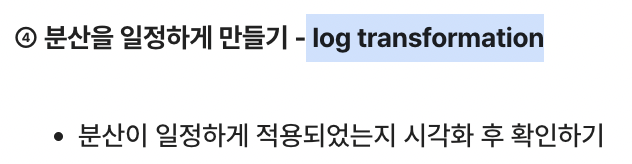

In [190]:
airp_log = np.log(airp)
airp_log

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


In [191]:
airp_log.info()
# float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 1.2 KB


airp -> mean 280.298611  
airp_log -> mean 5.542176

In [192]:
airp_log.describe()

,#Passengers
count,144.000000
mean,5.542176
std,0.441456
min,4.644391
25%,5.192957
50%,5.581599
75%,5.887489
max,6.432940


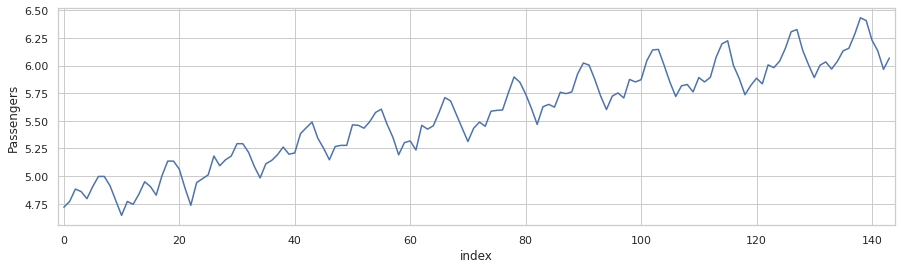

In [193]:
plt.figure(figsize= (15, 4))
plt.xlabel("index")
plt.ylabel("Passengers")
plt.xlim(-1, 144)
plt.plot(airp_log);

plot_acf(
    x,
    ax=None,
    lags=None,
    *,
    alpha=0.05,
    use_vlines=True,
    adjusted=False,
    fft=False,
    missing='none',
    title='Autocorrelation',
    zero=True,
    auto_ylims=False,
    bartlett_confint=True,
    vlines_kwargs=None,
    **kwargs,
)

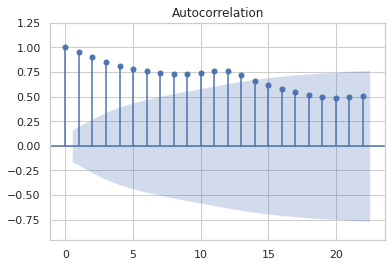

In [194]:
plot_acf(airp_log, alpha=0.05, use_vlines=True, auto_ylims=True);

plot_pacf(
    x,
    ax=None,
    lags=None,
    alpha=0.05,
    method=None,
    use_vlines=True,
    title='Partial Autocorrelation',
    zero=True,
    vlines_kwargs=None,
    **kwargs,
)

the default will change tounadjusted Yule-Walker ('ywm')

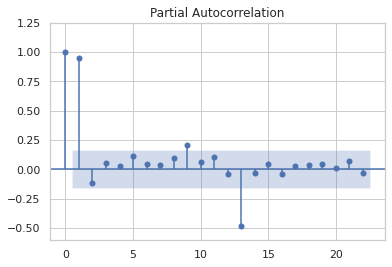

In [195]:
plot_pacf(airp_log, alpha=0.05, use_vlines=True, method='ywm', auto_ylims=True);

https://www.statsmodels.org/dev/_modules/statsmodels/graphics/tsaplots.html#plot_pacf

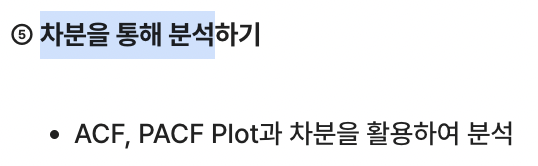

In [196]:
airp_diff= airp_log.diff()
airp_diff

,#Passengers
0,NaN
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022
...,...
139,-0.026060
140,-0.176399
141,-0.097083
142,-0.167251


In [197]:
airp_diff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #Passengers  143 non-null    float64
dtypes: float64(1)
memory usage: 1.2 KB


In [198]:
airp_diff.describe()

,#Passengers
count,143.000000
mean,0.009440
std,0.106556
min,-0.223144
25%,-0.080024
50%,0.014815
75%,0.105882
max,0.223144


In [199]:
airp_diff.isnull().sum()

#Passengers    1
dtype: int64

airp_diff.dropna(
    axis: 'Axis' = 0,
    how: 'str' = 'any',
    thresh=None,
    subset=None,
    inplace: 'bool' = False,
)

In [200]:
airp_diff.dropna(inplace= True)

In [201]:
airp_diff

,#Passengers
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022
5,0.109484
...,...
139,-0.026060
140,-0.176399
141,-0.097083
142,-0.167251


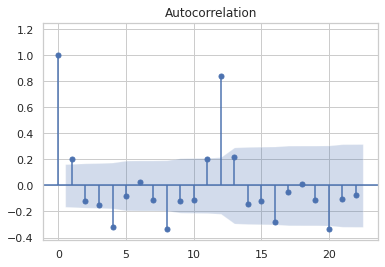

In [202]:
plot_acf(airp_diff, alpha=0.05, use_vlines=True, auto_ylims=True);

lag 4, 8, 12

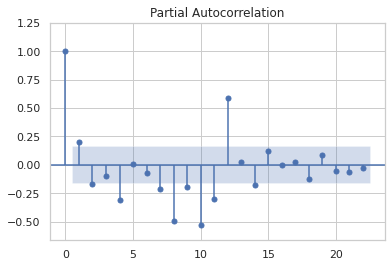

In [203]:
plot_pacf(airp_diff, alpha=0.05, use_vlines=True, method='ywm', auto_ylims=True);

lag 4, 8, 10, 12

In [204]:
airp_log.describe()

,#Passengers
count,144.000000
mean,5.542176
std,0.441456
min,4.644391
25%,5.192957
50%,5.581599
75%,5.887489
max,6.432940


In [205]:
airp_diff.describe()

,#Passengers
count,143.000000
mean,0.009440
std,0.106556
min,-0.223144
25%,-0.080024
50%,0.014815
75%,0.105882
max,0.223144


In [206]:
train_size = int(len(airp_log) * 0.8)
# 144 * 0.8 = 115.2
airp_train = airp_log[:train_size]
airp_test = airp_log[train_size:]

In [207]:
len(airp_log) * 0.8

115.2

In [208]:
airp_train.shape, airp_test.shape

((115, 1), (29, 1))

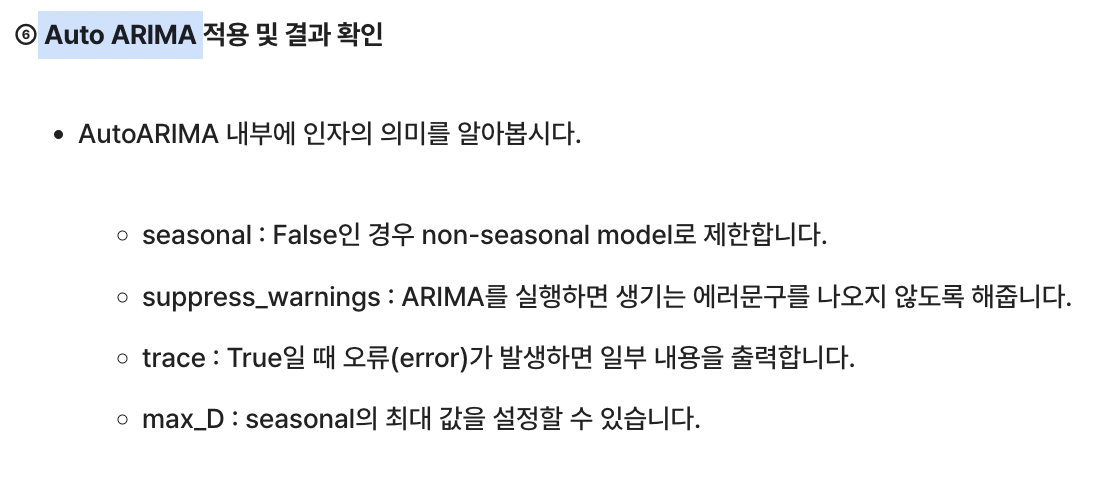

In [209]:
pm.__all__

['arima',
 'compat',
 'context_managers',
 'datasets',
 'decorators',
 'model_selection',
 'preprocessing',
 'utils',
 'ARIMA',
 'acf',
 'autocorr_plot',
 'auto_arima',
 'c',
 'decompose',
 'pacf',
 'plot_acf',
 'plot_pacf',
 'show_versions',
 'StepwiseContext']

In [210]:
dir(pm)

['ARIMA',
 'AutoARIMA',
 'Path',
 'StepwiseContext',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'acf',
 'arima',
 'auto_arima',
 'autocorr_plot',
 'base',
 'c',
 'compat',
 'context_managers',
 'datasets',
 'decompose',
 'decorators',
 'metrics',
 'model_selection',
 'pacf',
 'plot_acf',
 'plot_pacf',
 'preprocessing',
 'setup_module',
 'show_versions',
 'tsdisplay',
 'utils',
 'version_path',
 'warnings']

pm.AutoARIMA(
    start_p=2,
    d=None,
    start_q=2,
    max_p=5,
    max_d=2,
    max_q=5,
    start_P=1,
    D=None,
    start_Q=1,
    max_P=2,
    max_D=1,
    max_Q=2,
    max_order=5,
    m=1,
    seasonal=True,
    stationary=False,
    information_criterion='aic',
    alpha=0.05,
    test='kpss',
    seasonal_test='ocsb',
    stepwise=True,
    n_jobs=1,
    start_params=None,
    trend=None,
    method='lbfgs',
    maxiter=50,
    offset_test_args=None,
    seasonal_test_args=None,
    suppress_warnings=True,
    error_action='trace',
    trace=False,
    random=False,
    random_state=None,
    n_fits=10,
    out_of_sample_size=0,
    scoring='mse',
    scoring_args=None,
    with_intercept='auto',
    **kwargs,
)

In [211]:
# seasonal=True, suppress_warnings=True, trace=False, max_D=1
aarima = pm.AutoARIMA(seasonal = True, 
             suppress_warnings = True, 
             trace = True, 
             max_D = 12)# 계절차분(D) = 12
res = aarima.fit(airp_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-196.702, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-196.895, Time=0.20 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-196.569, Time=0.11 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 4.234 seconds


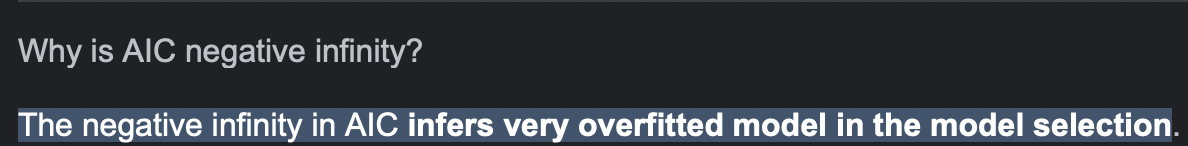

ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-196.895  

AIC가 양수라면 가장 작은값, 음수라면 가장 큰 값

ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733  

In [212]:
aarima

AutoARIMA(max_D=12, trace=True)

In [213]:
res

AutoARIMA(max_D=12, trace=True)

res.predict(
    self,
    n_periods=10,
    X=None,
    return_conf_int=False,
    alpha=0.05,
    **kwargs,
)  
n_periods=10 -> 10 steps씩 예측  
return_conf_int= True -> 신뢰구간 출력
https://assaeunji.github.io/data%20analysis/2021-09-25-arimastock/

In [214]:
#confidence interval까지 도출
preds, conf_int = res.predict(n_periods= airp_test.shape[0], 
                              return_conf_int= True) 

# 아래의 코드 결과값을 서로 비교 분석해봅시다.
print(preds.shape) 
print(type(preds))
print('--' * 40)
print(preds.shape[0])
print(type(preds.shape[0]))

(29,)
<class 'numpy.ndarray'>
--------------------------------------------------------------------------------
29
<class 'int'>


In [215]:
print(preds)
print('--'*40)
print(conf_int)

[6.18010083 6.14616332 6.15817888 6.17019443 6.18220998 6.19422554
 6.20624109 6.21825665 6.2302722  6.24228775 6.25430331 6.26631886
 6.27833442 6.29034997 6.30236553 6.31438108 6.32639663 6.33841219
 6.35042774 6.3624433  6.37445885 6.3864744  6.39848996 6.41050551
 6.42252107 6.43453662 6.44655218 6.45856773 6.47058328]
--------------------------------------------------------------------------------
[[5.98736259 6.37283907]
 [5.85107277 6.44125387]
 [5.82729445 6.48906331]
 [5.807027   6.53336186]
 [5.78940386 6.57501611]
 [5.77386531 6.61458577]
 [5.760025   6.65245718]
 [5.74760298 6.68891031]
 [5.73638867 6.72415573]
 [5.72621895 6.75835656]
 [5.71696441 6.7916422 ]
 [5.70852037 6.82411736]
 [5.70080067 6.85586817]
 [5.69373342 6.88696652]
 [5.68725791 6.91747314]
 [5.68132227 6.94743989]
 [5.67588182 6.97691145]
 [5.6708977  7.00592668]
 [5.66633588 7.0345196 ]
 [5.66216639 7.0627202 ]
 [5.65836262 7.09055508]
 [5.65490084 7.11804797]
 [5.65175978 7.14522014]
 [5.6489203  7.1720

In [216]:
preds.shape, conf_int.shape

((29,), (29, 2))

예측 성능을 시각화합니다. 
0. train과 test data를 축(axis)으로 만들었습니다.
1. x축은 test으로 만들어 놓은 train data를 사용하고, y축에 train data를 사용하여 train data를 시각화 합니다.
2. 1번 그래프에서 정답(AutoARIMA를 통해 만든 예측 값)에 해당하는 일자형 그래프가 생성됩니다.
3. 원래 가지고 있던 데이터셋의 y값(지도 학습의 정답)을 산점도(scatter plot)로 생성합니다.
4. 2, 3번의 분포에 해당하는 구간을 채워 그래프로 나타냈습니다.

In [217]:
airp_train.shape, preds.shape

((115, 1), (29,))

In [218]:
x_axis = np.arange(airp_train.shape[0] + preds.shape[0]) 
# 115 + 29, plot을 그리기 위해 x축을 생성합니다. # 0

In [219]:
x_axis.shape, airp_train.shape

((144,), (115, 1))

In [220]:
x_axis[:115]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114])

In [221]:
airp_train

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
110,5.891644
111,5.852202
112,5.894403
113,6.075346


plt.fill_between(
    x,
    y1,
    y2=0,
    where=None,
    interpolate=False,
    step=None,
    *,
    data=None,
    **kwargs,
)

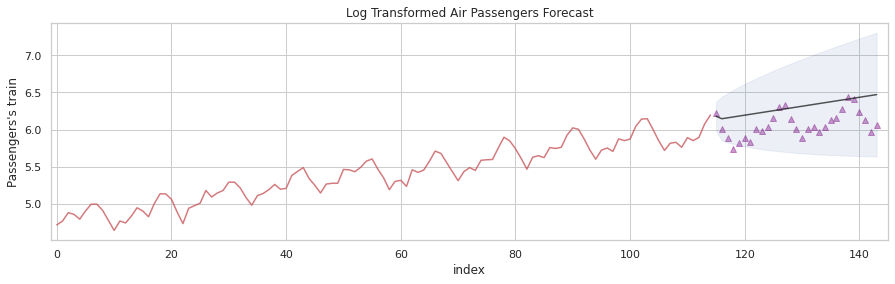

In [222]:
plt.figure(figsize= (15, 4))

#x_axis[:115] -> x축, airp_train -> y 축
plt.plot(x_axis[:airp_train.shape[0]],
         airp_train, 
         alpha=0.75, color= 'r') # 1

#x_axis[115 : 144]
plt.plot(x_axis[airp_train.shape[0]:], 
         preds, 
         alpha=0.75, color= 'k') # 2

plt.scatter(x_axis[airp_train.shape[0]:], 
            airp_test, 
            alpha=0.4, marker='^', color= 'purple')  # 3 기존 test data는 scatter

plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], 
                 conf_int[:, 1],
                 alpha=0.1, color='b') # 4

plt.xlabel("index")
plt.ylabel("Passengers's train")
plt.xlim(-1, 145)
plt.title("Log Transformed Air Passengers Forecast") 
plt.show() # 4개의 plot을 시각화 합니다.

In [223]:
x_axis[-preds.shape[0]:]
#x_axis[-29:]

array([115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143])

In [224]:
conf_int.shape

(29, 2)

In [225]:
conf_int[:] 

array([[5.98736259, 6.37283907],
       [5.85107277, 6.44125387],
       [5.82729445, 6.48906331],
       [5.807027  , 6.53336186],
       [5.78940386, 6.57501611],
       [5.77386531, 6.61458577],
       [5.760025  , 6.65245718],
       [5.74760298, 6.68891031],
       [5.73638867, 6.72415573],
       [5.72621895, 6.75835656],
       [5.71696441, 6.7916422 ],
       [5.70852037, 6.82411736],
       [5.70080067, 6.85586817],
       [5.69373342, 6.88696652],
       [5.68725791, 6.91747314],
       [5.68132227, 6.94743989],
       [5.67588182, 6.97691145],
       [5.6708977 , 7.00592668],
       [5.66633588, 7.0345196 ],
       [5.66216639, 7.0627202 ],
       [5.65836262, 7.09055508],
       [5.65490084, 7.11804797],
       [5.65175978, 7.14522014],
       [5.6489203 , 7.17209072],
       [5.64636509, 7.19867705],
       [5.64407841, 7.22499483],
       [5.64204596, 7.25105839],
       [5.64025463, 7.27688083],
       [5.63869243, 7.30247414]])

In [226]:
conf_int[:, 0] # y1

array([5.98736259, 5.85107277, 5.82729445, 5.807027  , 5.78940386,
       5.77386531, 5.760025  , 5.74760298, 5.73638867, 5.72621895,
       5.71696441, 5.70852037, 5.70080067, 5.69373342, 5.68725791,
       5.68132227, 5.67588182, 5.6708977 , 5.66633588, 5.66216639,
       5.65836262, 5.65490084, 5.65175978, 5.6489203 , 5.64636509,
       5.64407841, 5.64204596, 5.64025463, 5.63869243])

In [227]:
conf_int[:, 1] # y2

array([6.37283907, 6.44125387, 6.48906331, 6.53336186, 6.57501611,
       6.61458577, 6.65245718, 6.68891031, 6.72415573, 6.75835656,
       6.7916422 , 6.82411736, 6.85586817, 6.88696652, 6.91747314,
       6.94743989, 6.97691145, 7.00592668, 7.0345196 , 7.0627202 ,
       7.09055508, 7.11804797, 7.14522014, 7.17209072, 7.19867705,
       7.22499483, 7.25105839, 7.27688083, 7.30247414])

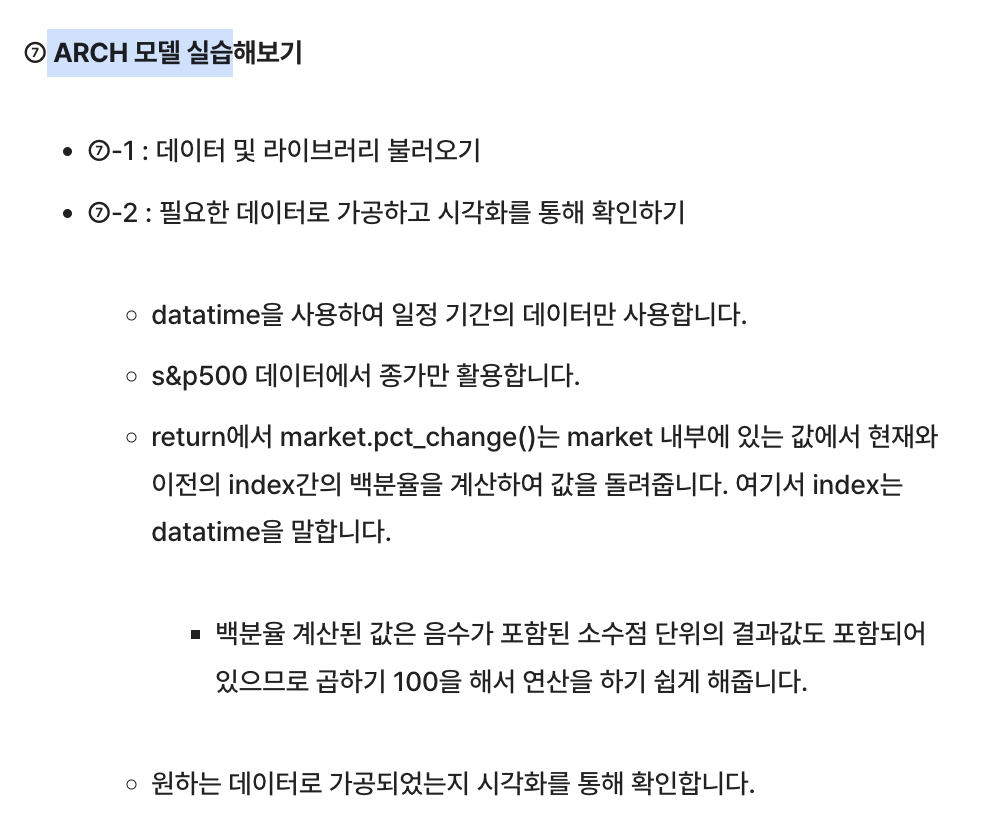

In [228]:
import datetime as dt 
# 날짜와 시간을 조작할 수 있는 Python 라이브러리 입니다.
import arch.data.sp500 
# S&P 500 데이터셋을 arch에서 불러옵니다.

datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])

In [229]:
st = dt.datetime(2002, 1, 1) #start date
en = dt.datetime(2022, 1, 1) #end date

In [230]:
st

datetime.datetime(2002, 1, 1, 0, 0)

In [231]:
en

datetime.datetime(2022, 1, 1, 0, 0)

In [232]:
dir(arch.data.sp500)

['DataFrame',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load',
 'load_file']

In [233]:
data = arch.data.sp500.load() #s&p 500 데이터 불러오기

In [234]:
data.info()
#5031, 6 columns, float64

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 1999-01-04 to 2018-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5031 non-null   float64
 1   High       5031 non-null   float64
 2   Low        5031 non-null   float64
 3   Close      5031 non-null   float64
 4   Adj Close  5031 non-null   float64
 5   Volume     5031 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.1 KB


In [235]:
data.tail(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,2498.939941,2509.23999,2482.820068,2506.850098,2506.850098,3442870000


In [236]:
market = data["Adj Close"] #종가만 활용
#Adjusted Closing Price 조정 종가

In [237]:
market.head(5)

Date
1999-01-04    1228.099976
1999-01-05    1244.780029
1999-01-06    1272.339966
1999-01-07    1269.729980
1999-01-08    1275.089966
Name: Adj Close, dtype: float64

In [238]:
type(market)

pandas.core.series.Series

### Series.pct_change
(periods=1, fill_method='pad', limit=None, freq=None, **kwargs)  
Percentage change between the current and a prior element.
https://pandas.pydata.org/docs/reference/api/pandas.Series.pct_change.html?highlight=series%20pct_change#pandas.Series.pct_change

In [239]:
returns.head()

Date
1999-01-05    1.358200
1999-01-06    2.214041
1999-01-07   -0.205133
1999-01-08    0.422136
1999-01-11   -0.879151
Name: Adj Close, dtype: float64

In [240]:
returns.index.min()

Timestamp('1999-01-05 00:00:00')

In [241]:
returns.index.min()

Timestamp('1999-01-05 00:00:00')

In [242]:
market

Date
1999-01-04    1228.099976
1999-01-05    1244.780029
1999-01-06    1272.339966
1999-01-07    1269.729980
1999-01-08    1275.089966
                 ...     
2018-12-24    2351.100098
2018-12-26    2467.699951
2018-12-27    2488.830078
2018-12-28    2485.739990
2018-12-31    2506.850098
Name: Adj Close, Length: 5031, dtype: float64

In [244]:
type(market)

pandas.core.series.Series

In [245]:
market.isnull().sum()

0

In [246]:
market.pct_change()

Date
1999-01-04         NaN
1999-01-05    0.013582
1999-01-06    0.022140
1999-01-07   -0.002051
1999-01-08    0.004221
                ...   
2018-12-24   -0.027112
2018-12-26    0.049594
2018-12-27    0.008563
2018-12-28   -0.001242
2018-12-31    0.008492
Name: Adj Close, Length: 5031, dtype: float64

In [247]:
market.pct_change().isnull().sum()

1

In [249]:
returns

Date
1999-01-05    1.358200
1999-01-06    2.214041
1999-01-07   -0.205133
1999-01-08    0.422136
1999-01-11   -0.879151
                ...   
2018-12-24   -2.711225
2018-12-26    4.959374
2018-12-27    0.856268
2018-12-28   -0.124158
2018-12-31    0.849248
Name: Adj Close, Length: 5030, dtype: float64

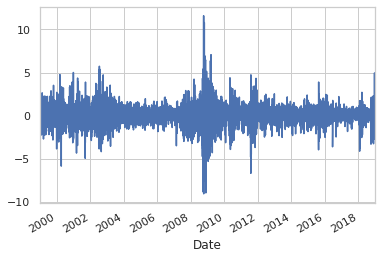

In [248]:
returns = 100 * market.pct_change().dropna() #return값으로 변환

ax = returns.plot() # 수익률을 그래프로 만들기

xlim = ax.set_xlim(returns.index.min(), 
                   returns.index.max()) 
# xlim은 x축 값의 보기를 제한 합니다. 
plt.show()

ax.set_xlim(
    left=None,
    right=None,
    emit=True,
    auto=False,
    *,
    xmin=None,
    xmax=None,
)  
Docstring:
Set the x-axis view limits.

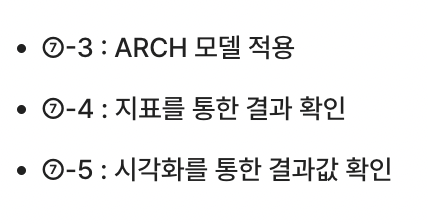

https://arch.readthedocs.io/en/latest/univariate/introduction.html#arch.univariate.arch_model

In [250]:
# ⑦-3 : ARCH 모델 적용
from arch import arch_model

### arch_model  
(
    y: 'Optional[ArrayLike]',
    x: 'Optional[ArrayLike]' = None,
    mean: "Literal['Constant', 'Zero', 'LS', 'AR', 'ARX', 'HAR', 'HARX', 'constant', 'zero']" = 'Constant',
    lags: 'Union[None, int, List[int], Int32Array, Int64Array]' = 0,
    vol: "Literal['GARCH', 'ARCH', 'EGARCH', 'FIGARCH', 'APARCH', 'HARCH', 'FIGARCH']" = 'GARCH',
    p: 'Union[int, List[int]]' = 1,
    o: 'int' = 0,
    q: 'int' = 1,
    power: 'float' = 2.0,
    dist: "Literal['normal', 'gaussian', 't', 'studentst', 'skewstudent', 'skewt', 'ged', 'generalized error']" = 'normal',
    hold_back: 'Optional[int]' = None,
    rescale: 'Optional[bool]' = None,
) -> 'HARX'  
Docstring:
Initialization of common ARCH model specifications

In [251]:
am = arch_model(returns) #return을 arch모델에 적합

### ARCHModel.fit
(update_freq=1, disp='final', starting_values=None, cov_type='robust', show_warning=True, first_obs=None, last_obs=None, tol=None, options=None, backcast=None)  
https://arch.readthedocs.io/en/latest/univariate/generated/generated/arch.univariate.base.ARCHModel.fit.html  
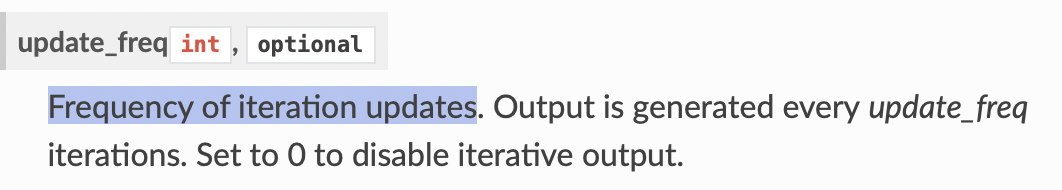

In [252]:
res = am.fit(update_freq= 5)

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2765831170655
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11


In [274]:
type(res)

arch.univariate.base.ARCHModelResult

In [253]:
print(res.summary())
#Mean Model: Constant Mean
#Method: Maximum Likelihood
# AIC: 13881.4
# BIC: 13907.5

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Wed, Jan 04 2023   Df Residuals:                     5029
Time:                        15:18:05   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0564  1.149e-02      4.906  9.302e-07 [3.

t -> true value  

p-value  
수경님이 알려주셨다유
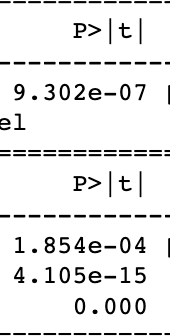

volatility model을 보면 alpha[1], Beta[1]은 GARCH(1,1)을 의미하며,   
p-value를 통해 신뢰도 99%에서 이들이 유의미함을 도출??????????????????????????????????????/

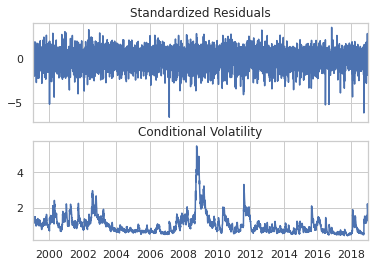

In [273]:
# ⑦-5 : 시각화를 통한 결과값 확인
res.plot();

# 회고

프로젝트를 하기전에 미니 프로젝트를 끝냈는데요. 
미니 프러젝트하는 동안 이해를 못했던 부분도 많았고 그 부분을 설명을 하라고 한다면 설명은 못했던 저였는데    
프로젝트를 통해서 조금은 눈이 뜨게 된 후 다시 보니 이해되는 부분들이 조금 더 생겼습니다.  
하지만 ARCH모델이 적합한지 그래프를 보는 방법 등등 여전히 까막눈이기에  
이 부분을 연결해줄 다리 역할을 해주신다면 다음번에는 더 좋은 결과 및 정보를 얻을 것이라 생각합니다.  
이상 autoARIMA 덕분에 acf pacf를 신경 쓸 필요가 없었던 프로젝트였습니다.

P.S 선생님 이건 아닌거 같아요